## 모듈 불러오기

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## 데이터 가져오기 및 테스트 셋 분리

In [2]:
data = load_diabetes()

df_X = data.data
df_y = data.target

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

## 손실함수 정의

In [3]:
def MSE(y_pred, y):
  mse = ((y_pred - y) ** 2).mean()
  return mse

def loss(y_pred, y):
  return MSE(y_pred, y)

## 선형회귀 모델 정의
- 가중치는 모델의 내부 속성이기에 선형회귀 모델을 클래스로 정의
- fit으로 학습, predict로 예측

In [4]:
class LinearModel:
  def __init__(self, n_features):
    self.W = np.random.rand(n_features)
    self.b = np.random.rand()

  def gradient(self, X, y):
      # 데이터 수
      N = len(y)

      y_pred = self.predict(X)
      dw = (1 / N) * 2 * X.T.dot(y_pred - y)
      db = (1 / N) * 2 * (y_pred - y).sum()

      return dw, db

  def fit(self, X, y, learning_rate):
    # 그레디언트 계산
    dW, db = self.gradient(X, y)
    # 가중치 업데이트
    self.W -= learning_rate * dW
    self.b -= learning_rate * db

    # 학습 후 loss값을 계산하여 리턴
    y_pred = self.predict(X)
    L = loss(y_pred, y)
    return L

  def predict(self, X):
    # X는 행렬 self.W를 벡터이기에 dot()를 사용하면 행렬곱 연산을 수행
    # 계산 결과는 벡터로 각 샘플마다 예측값을 저장하여 리턴
    return X.dot(self.W) + self.b

## 훈련
- 훈련시 learning_rate를 너무 낮게하면 오차가 너무 크게 나옴
- 따라서 학습률을 0.1 정도로 조절하고 epoch를 3000으로 올리니 loss가 3000 밑으로 내려감

In [5]:
# 모델에 특성 수도 함께 전달
lr = LinearModel(X_train.shape[1])

learning_rate = 0.1
losses = []

for i in range(1, 3001):
  lr_loss = lr.fit(X_train, y_train, learning_rate)
  losses.append(lr_loss)
  if i % 100 == 0:
      print('Iteration %d : Loss %0.4f' % (i, lr_loss))

Iteration 100 : Loss 5377.6194
Iteration 200 : Loss 4875.6756
Iteration 300 : Loss 4502.4389
Iteration 400 : Loss 4221.2164
Iteration 500 : Loss 4006.1943
Iteration 600 : Loss 3839.1686
Iteration 700 : Loss 3707.2618
Iteration 800 : Loss 3601.3294
Iteration 900 : Loss 3514.8468
Iteration 1000 : Loss 3443.1314
Iteration 1100 : Loss 3382.7984
Iteration 1200 : Loss 3331.3805
Iteration 1300 : Loss 3287.0606
Iteration 1400 : Loss 3248.4851
Iteration 1500 : Loss 3214.6324
Iteration 1600 : Loss 3184.7200
Iteration 1700 : Loss 3158.1394
Iteration 1800 : Loss 3134.4098
Iteration 1900 : Loss 3113.1449
Iteration 2000 : Loss 3094.0296
Iteration 2100 : Loss 3076.8028
Iteration 2200 : Loss 3061.2453
Iteration 2300 : Loss 3047.1708
Iteration 2400 : Loss 3034.4192
Iteration 2500 : Loss 3022.8516
Iteration 2600 : Loss 3012.3467
Iteration 2700 : Loss 3002.7977
Iteration 2800 : Loss 2994.1101
Iteration 2900 : Loss 2986.1999
Iteration 3000 : Loss 2978.9923


# 테스트 셋 mse

In [6]:
prediction = lr.predict(X_test)
# test set에 대한 mse
mse = loss(prediction, y_test)
mse

2870.5847168744217

# 예측 시각화

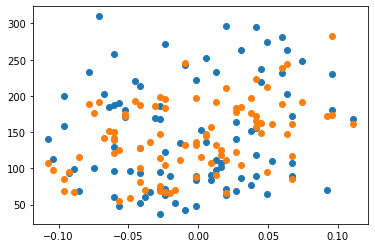

In [7]:
# 실제 y값
plt.scatter(X_test[:, 0], y_test)
# 예측 y값
plt.scatter(X_test[:, 0], prediction)
plt.show()